In [1]:
# To use these packages, we need to import them first.

import pathlib           # Use the handy Python directory and path library
import math   as m       # The standard Python math library
import numpy  as np      # Numpy array library
import pandas as pd      # Pandas data table and time series library


input_dir = pathlib.Path('InputFolder_Assig')   # Our input files are here.

In [2]:
from scipy.stats import norm      # Import the Normal distribution library

In [3]:
# Using na_filter = True (which is the default setting) detects missing
# values from source and converts them to NaN in the dataframe

pv_data = pd.read_csv(r'C:\Users\Elle Westwood\Documents\FINBA_files\Inputfolder_Assig\PV.csv', na_filter = True )

print( pv_data.isnull().any() )

pv_data

Scenario       False
Scenario PV    False
dtype: bool


,Scenario,Scenario PV
0,1,144.089996
1,2,140.919998
2,3,140.639999
3,4,149.220001
4,5,150.389999
...,...,...
245,246,159.602245
246,247,159.553716
247,248,158.689690
248,249,158.825604


In [4]:
pv_data.info()   # Get info on dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Scenario       250 non-null int64
Scenario PV    250 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [5]:
# Assign base pv to the variable 'a'
a = 150

In [6]:
#We are using 150 as base PV to calculate the clean PnL using formula 
#Clean PnL =  clean_PV - Base_Pv

pv_data["PnL"]= (pv_data["Scenario PV"] - a)
pv_data

,Scenario,Scenario PV,PnL
0,1,144.089996,-5.910004
1,2,140.919998,-9.080002
2,3,140.639999,-9.360001
3,4,149.220001,-0.779999
4,5,150.389999,0.389999
...,...,...,...
245,246,159.602245,9.602245
246,247,159.553716,9.553716
247,248,158.689690,8.689690
248,249,158.825604,8.825604


In [7]:
#Sort the PnLs from the raw vector in increasing order with worst loss at the top, and add the ranks 
pv_data["PnL_Rank"] = pv_data["PnL"].rank() 
pv_data.sort_values("PnL", inplace = True) 

pv_data
  

,Scenario,Scenario PV,PnL,PnL_Rank
2,3,140.639999,-9.360001,1.0
1,2,140.919998,-9.080002,2.0
41,42,140.960007,-9.039993,3.0
17,18,142.470001,-7.529999,4.0
18,19,142.520004,-7.479996,5.0
...,...,...,...,...
111,112,171.833533,21.833533,246.0
107,108,171.912876,21.912876,247.0
109,110,172.051723,22.051723,248.0
108,109,172.329416,22.329416,249.0


In [8]:
#Calculate the VaR rank by multiplying the ('1 -percentile or confidence level') by the number of data values in the vector

#((1-99%)*count(pv_data))

count_row = pv_data.shape[0]   # count rows in a dataframe
count_row

M = ((1-0.99) * count_row)    #apply formula
print (M)


2.500000000000002


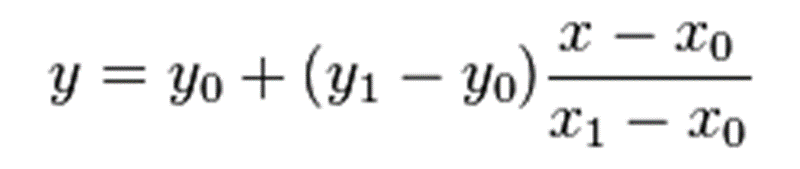

Formula used to calculate VAR

In [9]:
# Assign parameters using iloc

y0= pv_data.iloc[1,2]
y1= pv_data.iloc[2,2]
x= M
x0= pv_data.iloc[1,3] 
x1= pv_data.iloc[2,3]

In [10]:
# Calculate the value corresponding to the rank from previous step. Interpolate if required.
def Var (y0, y1, x, x0, x1):

    Var99 = y0 + (y1 - y0) * ((x - x0)/(x1 - x0))
    
    return Var99

In [11]:
x = Var (y0, y1, x, x0, x1) #Return Var

print ("Var99: ",x )

Var99:  -9.059997499999994


Compute 97.5% ES

In [12]:
#Calculate the VaR rank by multiplying the ('1 -percentile or confidence level') by the number of data values in the vector

#((1-97.7%)*count(pv_data))

count_row = pv_data.shape[0]    # count rows in a dataframe
count_row

N = ((1-0.975) * count_row)    # apply formula to get rank
print (N)


6.250000000000005


In [13]:
#Take the number of worst losses corresponding to the integer and take the average
# Take the integer part of the Rank	
int(N//1)

6

In [15]:
Newcol=(pv_data.iloc[0:6,2:4] ) #Assign the first 6 rows on colume "PnL" 

In [16]:
Newcol # 

,PnL,PnL_Rank
2,-9.360001,1.0
1,-9.080002,2.0
41,-9.039993,3.0
17,-7.529999,4.0
18,-7.479996,5.0
36,-7.320007,6.0


In [17]:
Newcol["PnL"]

2    -9.360001
1    -9.080002
41   -9.039993
17   -7.529999
18   -7.479996
36   -7.320007
Name: PnL, dtype: float64

In [18]:
type(Newcol)

pandas.core.frame.DataFrame

In [19]:
# Take the average
avg=Newcol["PnL"].mean(axis=0)

In [20]:
avg

-8.301666333333335